In [99]:
# Initialize these:
typeImg = "test" # photo/ cartoon/ top"
#numImg = "50" # 5 or 50
sz = 100

In [100]:
# # Include imports
import glob
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
import os
import pandas as pd
import numpy as np
import skimage.color as skcolor
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time

In [101]:
colNames = ["col_"+str(i) for i in range(58)] 
allConcepts = ["Paper", "Plastic", "Trash", "Compost", "Metal","Glass"]

# # Read data
# # Get the color ratings data -From file data_clean.csv
data = pd.read_csv("TestScripts/data_clean_test.csv",names = colNames)

# Get the LAB coordinates of colors from file LabOrig.csv
# # #colorData = pd.read_csv("LabOrig.csv",header=None)
colorData = pd.read_csv("TestScripts/Lab_test.csv",header=None)
colorDataRGB = pd.read_csv("TestScripts/RGB_test.csv",header=None)

category = pd.read_csv("TestScripts/Category_test.csv",header=None)
path = "E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads"
# if not os.path.exists( path + "/trainResized" ):
#    os.makedirs( path + "/trainResized/" )


In [102]:
colorData.loc[0]

0    51.573
1    62.234
2    32.198
Name: 0, dtype: float64

In [103]:
# Count total number of images
count = 0
for i in allConcepts:
    print(path + "/" +typeImg +"/" +i+"/*.*")
    trainFiles = glob.glob( path + "/" +typeImg +"/" +i+"/*.*" )
    count = count + len(trainFiles[:50])
    #print(count)
print("Category: ",typeImg)
print("Total images : ",count)

E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Paper/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Plastic/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Trash/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Compost/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Metal/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Glass/*.*
Category:  test
Total images :  300


In [104]:
import matlab.engine
category = pd.read_csv("Category.csv",header=None)

def getCategoriesMatrix(imageFileName,sz):
    ## Get total pixel counts of all 11 categories for this imageFile
    eng = matlab.engine.start_matlab()
    imageCat = np.array(eng.getCategories(imageFileName,sz))
    eng.quit()
     # imageCat : sz x sz matrix where each pixel has its category
    return imageCat

def getSegmentedImage(imageFileName,sz): # Returns segmented pixels in LAB and its corresponding color category.
    eng = matlab.engine.start_matlab()
    segImg, segImgCat = eng.activeContourSegmentation(imageFileName,sz, nargout=2)
    eng.quit()
    segImg = np.array(segImg)/255;
    segImg = skcolor.rgb2lab(segImg)
    segImgCat = np.array(segImgCat)
    return segImg, segImgCat


In [105]:
numColors = 37

In [69]:
numFt = 3
#X = np.zeros((count*numColors,numFt+1) )  # +1 for label #Number of features [] # Feature Vector -- 58N rows
init = time.time()
rowNum = -1
strtInd = []  # To keep track of the starting indices of fruits in the feature matrix
cvInd = 1 
counter = 0
sz = 100    # Size of image: 100 by 100
# ########
# allConcepts = ['Glass']
# rowNum = 9249
# counter = 9249

# ##
Rc = [1,10,20,30,40]   # Radii thresholds
Li = [40]              #[1, 10, 20, 30, 40]
R = [40]               #[1, 10, 20, 30, 40]     # same as L
hueAngle = [40]        #[5, 10, 20, 30, 40] # Hue Angle
##
for conceptNum,concept in enumerate(allConcepts):
    #conceptNum = 5
    t0 = time.time()
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
    # Get label for corresponding fruit (for given color)
    #label = data.loc[conceptNum]['col_'+str(color)]
    ct = 0    # Keeps track of images inside a category
    strtInd.append(counter)
    trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
    print("\tTotal number of images for ",concept," : ",len(trainFiles))
    t = []
    for m, nameFile in enumerate(trainFiles[:50]):
        t1 = time.time()
        #print("\nReading file ......")
        ct = ct + 1
        
        image = imread( nameFile )
        imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
        img = imageResized
        # Convert the pixels in  image to LAB space
        imgLAB = skcolor.rgb2lab(img)
        segmentedImg,segmentedImgCat = getSegmentedImage(nameFile,sz)
        imageWithCategories = getCategoriesMatrix(nameFile,sz)
        
        i1 = imgLAB[27:72,27:72,:] 
#         i2 = imgLAB[19:83,19:83,:]
#         i3 = imgLAB[12:90,12:90,:]
#         i4 = imgLAB[6:96,6:96,:]
#         i5 = np.copy(imgLAB)
        i6 = np.copy(segmentedImg)
        
        ii1 = imageWithCategories[27:72,27:72].flatten()
#         ii2 = imageWithCategories[19:83,19:83].flatten()
#         ii3 = imageWithCategories[12:90,12:90].flatten()
#         ii4 = imageWithCategories[6:96,6:96].flatten()
#         ii5 = np.copy(imageWithCategories).flatten()
#         ii6 = np.copy(segmentedImgCat).flatten()
        
        categoryImg1 = [sum(1 for p in ii1 if p-1 == k)/ii1.size for k in range(11)]
#         categoryImg2 = [sum(1 for p in ii2 if p-1 == k)/ii2.size for k in range(11)]
#         categoryImg3 = [sum(1 for p in ii3 if p-1 == k)/ii3.size for k in range(11)]
#         categoryImg4 = [sum(1 for p in ii4 if p-1 == k)/ii4.size for k in range(11)]
#         categoryImg5 = [sum(1 for p in ii5 if p-1 == k)/ii5.size for k in range(11)]
#         categoryImg6 = [sum(1 for p in ii6 if p-1 == k)/ii6.size for k in range(11)]
        
        
        for color in range(numColors):
            rowNum+=1
            counter += 1
            colCt = 0
            # Thus begin the long long process
            # Get spherical and add till 
            colorLAB = np.array(colorData.loc[color])   #get LAB values for specific color
            
#             ##   Columns 1-30
#             for i in range(6):
#                 if i == 0:
#                     distPixel = skcolor.deltaE_cie76(i1,colorLAB)
#                 elif i == 1:
#                     distPixel = skcolor.deltaE_cie76(i2,colorLAB)
#                 elif i == 2:
#                     distPixel = skcolor.deltaE_cie76(i3,colorLAB)
#                 elif i == 3:
#                     distPixel = skcolor.deltaE_cie76(i4,colorLAB)
#                 elif i == 4:
#                     distPixel = skcolor.deltaE_cie76(i5,colorLAB)
#                 else:
#                     distPixel = skcolor.deltaE_cie76(i6,colorLAB)
#                 distPixel = distPixel.flatten()
#                 #print(distPixel.size)
#                 for j,threshold in enumerate(Rc):
#                     num = sum(1 for t in distPixel  if t <= threshold)/distPixel.size
#                     #features.append(num)
#                     X[rowNum,colCt] = num
                    
#                     colCt+=1
            #print(colCt)
            
            # For features 31-180
            #for i in range(6):
            for i in [0,5]:
                if i == 0:
                    L = i1[:,:,0]
                    a = i1[:,:,1]
                    b = i1[:,:,2]
                elif i == 1:
                    L = i2[:,:,0]
                    a = i2[:,:,1]
                    b = i2[:,:,2]
                elif i == 2:
                    L = i3[:,:,0]
                    a = i3[:,:,1]
                    b = i3[:,:,2]
                elif i == 3:
                    L = i4[:,:,0]
                    a = i4[:,:,1]
                    b = i4[:,:,2]
                elif i == 4:
                    L = i5[:,:,0]
                    a = i5[:,:,1]
                    b = i5[:,:,2]
                else:
                    L = i6[:,:,0]
                    a = i6[:,:,1]
                    b = i6[:,:,2]
                    
                LTemp = L.flatten()
                r = np.sqrt(a**2+b**2).flatten()
                theta = np.degrees(np.arctan2(b,a)).flatten()

                L_diff = np.abs(LTemp - colorLAB[0])
                r_diff = np.abs(r - (np.sqrt(colorLAB[1]**2 + colorLAB[2]**2)))
                theta_diff = np.abs(theta - np.degrees(np.arctan2(colorLAB[2],colorLAB[1])))

                for j,r_th in enumerate(R):
                    l_th = Li[j] # L and R are the same.
                    for theta_th in hueAngle:
                        pixels = 0
                        for p in range(len(L_diff)):
                            if (L_diff[p] <= l_th and r_diff[p] <= r_th and theta_diff[p] <= theta_th) or (L_diff[p] <= l_th and r_diff[p] <= 2.5):
                                pixels += 1
                        X[rowNum,colCt] = pixels/(len(L_diff))
                        colCt+=1
            #print(colCt)
            
            colorCat = category.loc[color,0] 
            X[rowNum,colCt] = categoryImg1[colorCat-1]
            colCt+=1
            #print(colCt)

#             X[rowNum,colCt] = categoryImg2[colorCat-1]
#             colCt+=1
#             X[rowNum,colCt] = categoryImg3[colorCat-1]
#             colCt+=1
#             X[rowNum,colCt] = categoryImg4[colorCat-1]
#             colCt+=1
#             X[rowNum,colCt] = categoryImg5[colorCat-1]
#             colCt+=1
#             X[rowNum,colCt] = categoryImg6[colorCat-1]
#             colCt+=1
            label = data.loc[conceptNum]['col_'+str(color)]   ########################################3 FOR METAL
            X[rowNum,colCt] = label
            #print(colCt)
        h = time.time()-t1
        print("\t\t",m, "image: ",h ," seconds")
        t.append(h)
    print(t)
    print("\t** Time elapsed since last category: ",time.time()-t0," seconds **")
strtInd.append(len(X))
print(strtInd)
print("** Total Time elapsed: ",time.time()-init," seconds **")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 6 : Concept :  Glass
	Total number of images for  Glass  :  69
		 0 image:  46.59946274757385  seconds
		 1 image:  18.204385995864868  seconds
		 2 image:  19.20467710494995  seconds
		 3 image:  28.420008897781372  seconds
		 4 image:  17.64783549308777  seconds
		 5 image:  17.99191427230835  seconds
		 6 image:  19.555734872817993  seconds
		 7 image:  17.72363519668579  seconds
		 8 image:  18.120575666427612  seconds
		 9 image:  17.574060440063477  seconds
		 10 image:  17.741591691970825  seconds
		 11 image:  17.644838094711304  seconds
		 12 image:  64.02293515205383  seconds
		 13 image:  18.579309701919556  seconds
		 14 image:  19.332335233688354  seconds
		 15 image:  19.156848430633545  seconds
		 16 image:  17.70168709754944  seconds
		 17 image:  18.49054503440857  seconds
		 18 image:  46.22247362136841  seconds
		 19 image:  17.866296768188477  seconds
		 20 image:  17.758527278900146  seconds
		 21 image:  18.090622186660767  seconds
		

In [ ]:
strtInd

In [78]:
## convert your array into a dataframe
xxTemp = np.copy(X)
#y = np.copy(X[:,-1])
df = pd.DataFrame(xxTemp)
## save to xlsx file

filepath = 'dataTEST50.xlsx'
df.to_excel(filepath, index=False)
tot = len(xxTemp)

In [ ]:
# for conceptNum,concept in enumerate(allConcepts):
#     t0 = time.time()
#     print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
#     # Get label for corresponding fruit (for given color)
#     #label = data.loc[conceptNum]['col_'+str(color)]
#     ct = 0    # Keeps track of images inside a category
#     trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
#     print("\tTotal number of images for ",concept," : ",len(trainFiles))
#     t = []
#     for m, nameFile in enumerate(trainFiles[:50]):
#         print(nameFile)
#         p = imread(nameFile)
#         imageResized = resize( p, (sz,sz),anti_aliasing=True,mode='reflect')
        

In [ ]:
# trainFiles = glob.glob( path + "/" +typeImg +"/" +"Glass/*.*" )
# for m, nameFile in enumerate(trainFiles[8:50]):
#         image = imread( nameFile )
#         print(nameFile)
#         imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
#         img = imageResized
#         # Convert the pixels in  image to LAB space
#         imgLAB = skcolor.rgb2lab(img)


# Analysis

In [79]:
df = pd.read_excel(filepath)
Q = df.as_matrix()
Q.shape

(11100, 4)

In [80]:
len(Q)

11100

In [117]:
Xtest = np.column_stack([np.ones((len(Q),1)), Q[:,:-1]])
ytest = np.copy(Q[:,-1])
weights = [0.13858045, 0.13921446, 0.12137094, 0.30032727]
#[0.13772196, 0.11861657, 0.12768021, 0.32313017]

In [118]:
y_predAll = Xtest.dot(weights)

In [119]:
np.array([[3, 5, 6],[5, 6, 7]]).dot(np.array([1, 1,2]))

array([20, 25])

In [128]:
strtInd

[0, 1850, 3700, 5550, 7400, 9250, 11100]

In [137]:
ytest.shape

(11100,)

(1850,)
The true squared error (in color ratings) for left out fruit Paper is: 2.1331

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6526
p-value 0.0000


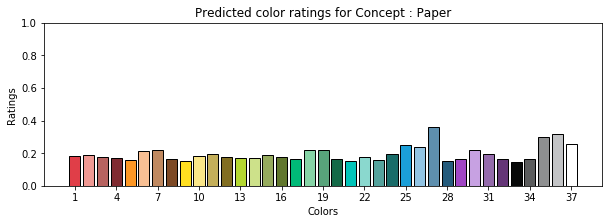

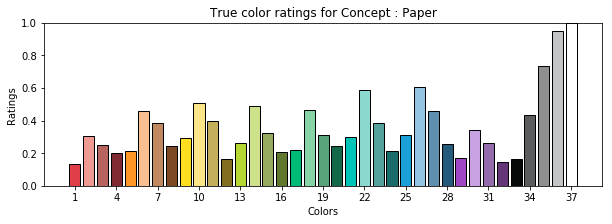

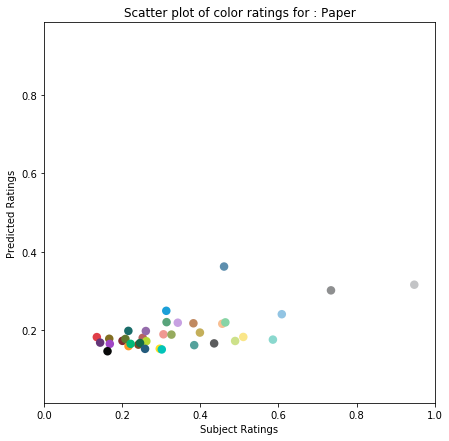

(1850,)
The true squared error (in color ratings) for left out fruit Plastic is: 1.5269

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0087
p-value 0.9591


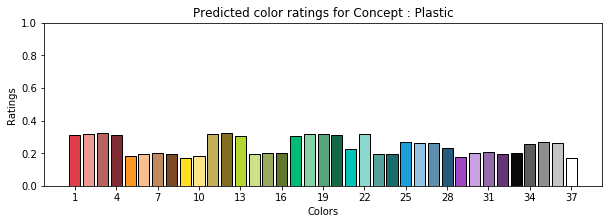

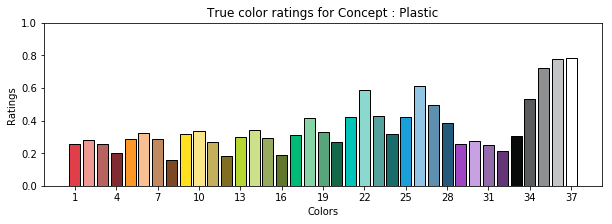

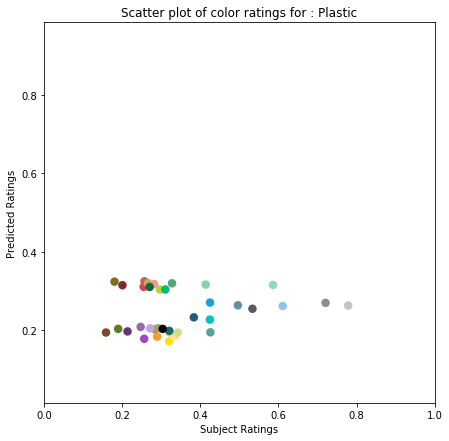

(1850,)
The true squared error (in color ratings) for left out fruit Trash is: 2.1410

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.2768
p-value 0.0972


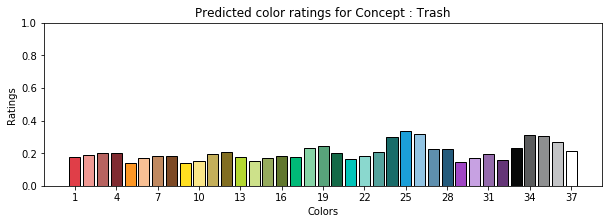

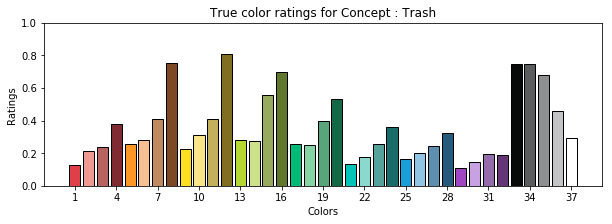

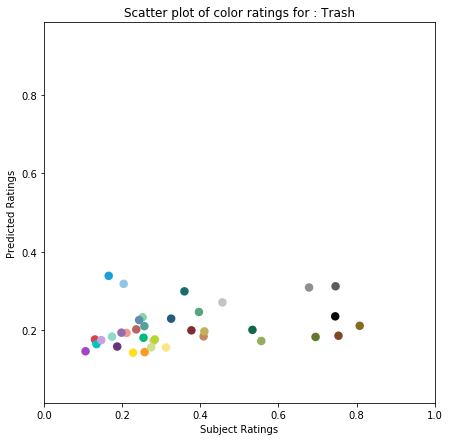

(1850,)
The true squared error (in color ratings) for left out fruit Compost is: 2.0933

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6031
p-value 0.0001


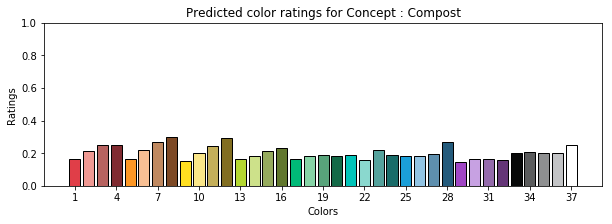

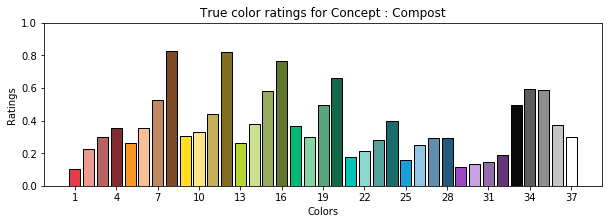

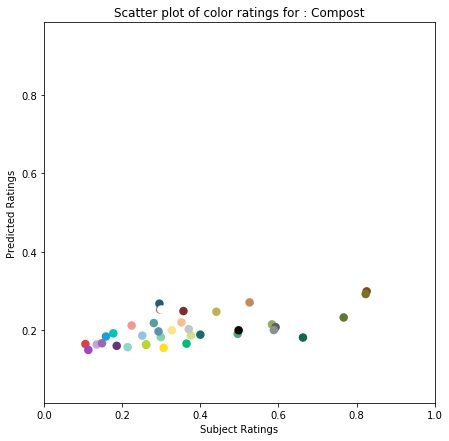

(1850,)
The true squared error (in color ratings) for left out fruit Metal is: 1.2929

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.5234
p-value 0.0009


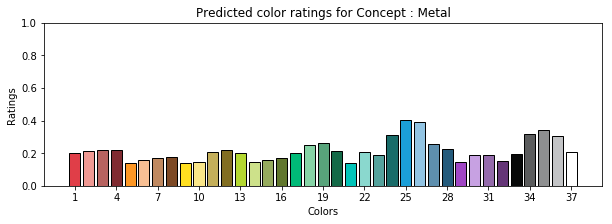

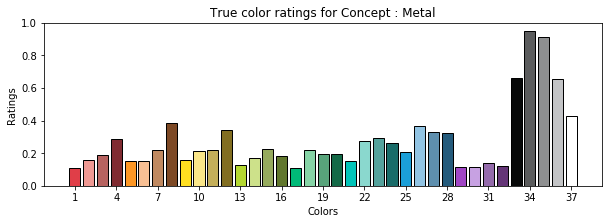

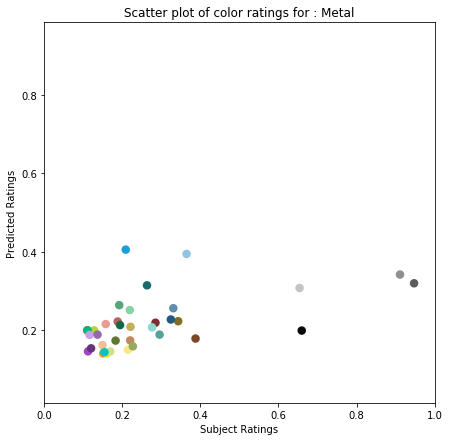

(1850,)
The true squared error (in color ratings) for left out fruit Glass is: 2.1582

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6652
p-value 0.0000


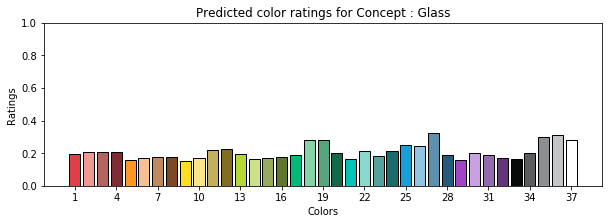

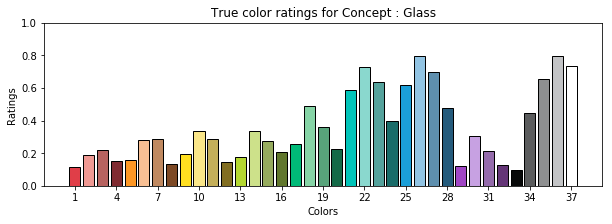

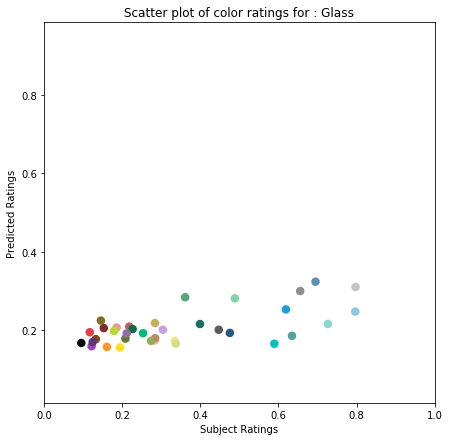

In [133]:
from scipy import stats
plt.close('all')
win0 = []
win1 = []
win2 = []

correlation = []
error = []

for i in range(len(strtInd)-1):
    # Leave one entire fruit group
    testFruit =  allConcepts[i]
    #print("\nLeaving out fruit group : ",allConcepts[i])
    y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i+1]])
    y_test = np.copy(ytest[strtInd[i]:strtInd[i+1]])
    print(y_pred.shape)
    totalTestImages = y_pred.size/numColors  #37N rows -> every image has 37 rows of data
    avg_pred =[np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)]

    # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
    trueRating = np.copy(y_test[0:numColors])
    
    sqErr = np.sum(pow(avg_pred - trueRating,2))
    print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)
    
    corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
    
    print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
    print("p-value %.4f" %pVal)

    error.append(sqErr)
    correlation.append(corrCoeff)
    win0.append(corrCoeff) # saves correlation for test fruit
    win1.append(trueRating) # saves true rating for test fruit
    win2.append(avg_pred)   # saves avg predicted rating for test fruit
    # Plot average color rating over all test images.
    fig= plt.figure(figsize=(10,3))
    barPlot = plt.bar(range(1,numColors+1),avg_pred,color = colorDataRGB.values,edgeColor = [0, 0, 0])
    plt.ylabel('Ratings')
    plt.xlabel('Colors')
    plt.title('Predicted color ratings for Concept : %s' %testFruit)
    plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
    plt.ylim(0,1)
    plt.show()

    fig= plt.figure(figsize=(10,3))
    barPlot = plt.bar(range(1,numColors+1), trueRating,color = colorDataRGB.values,edgeColor = [0, 0, 0])
    plt.ylabel('Ratings')
    plt.xlabel('Colors')
    plt.title('True color ratings for Concept : %s' %testFruit)
    plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
    plt.ylim(0,1)
    plt.show()

    # Scatter plot
    fig2 = plt.figure(figsize=(7,7))
    plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,marker = 'o',linewidths=2.5)
    plt.ylabel('Predicted Ratings')
    plt.xlabel('Subject Ratings')
    plt.title('Scatter plot of color ratings for : %s' %testFruit)
    plt.axis('equal')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show() 

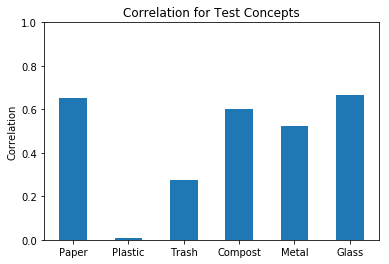

In [122]:
barWidth = 0.5
plt.bar(range(1,7),win0, width = barWidth)
plt.xticks(range(1,7),allConcepts)
plt.title("Correlation for Test Concepts")
plt.ylabel('Correlation')
plt.ylim(0,1)
plt.show()

# Analysis using just top 5

In [134]:
numColors

37

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Paper is: 2.3064

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.4632
p-value 0.0039


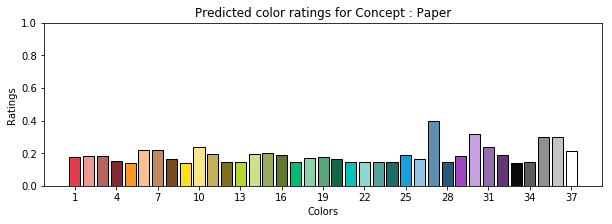

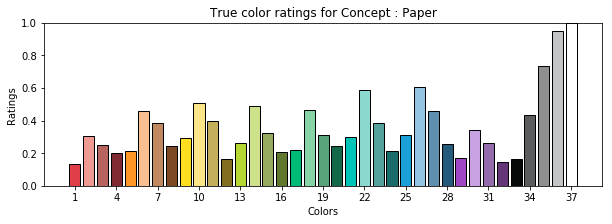

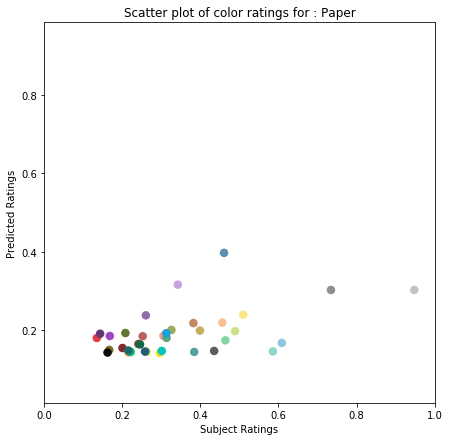

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Plastic is: 1.3521

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.1579
p-value 0.3506


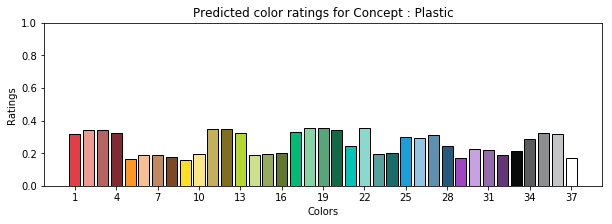

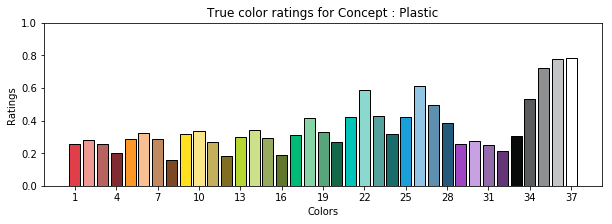

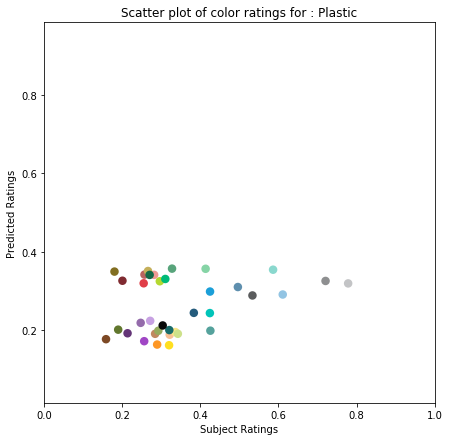

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Trash is: 2.0820

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.2811
p-value 0.0919


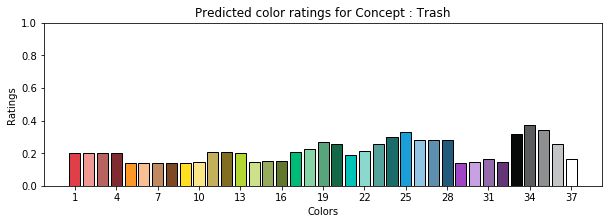

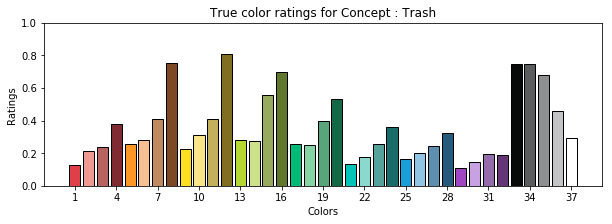

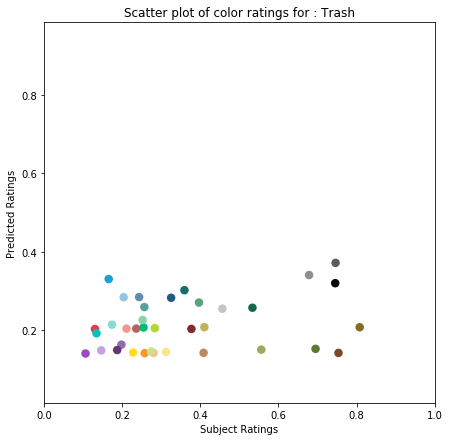

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Compost is: 2.0515

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.5607
p-value 0.0003


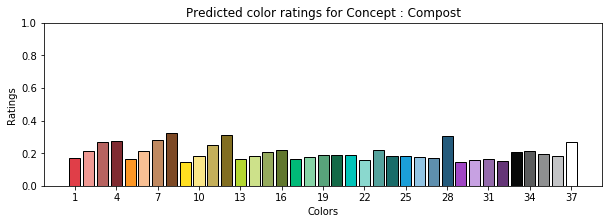

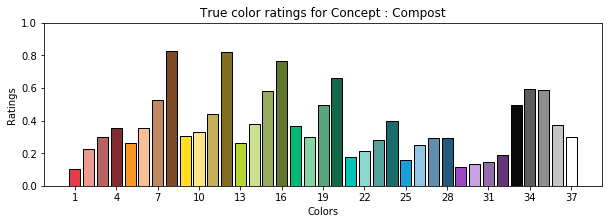

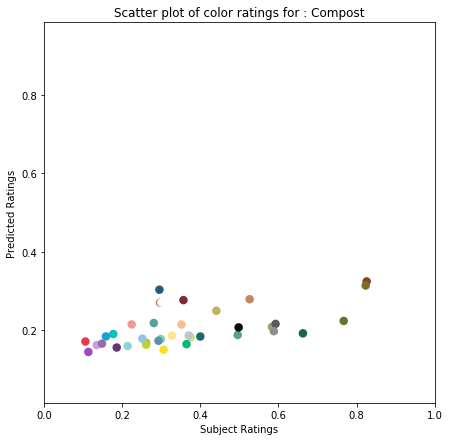

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Metal is: 1.5754

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.2152
p-value 0.2009


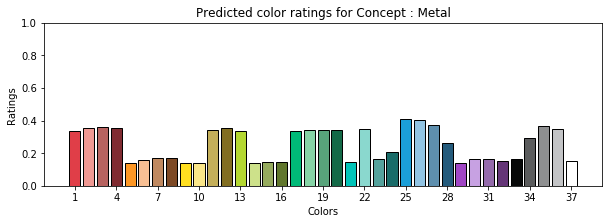

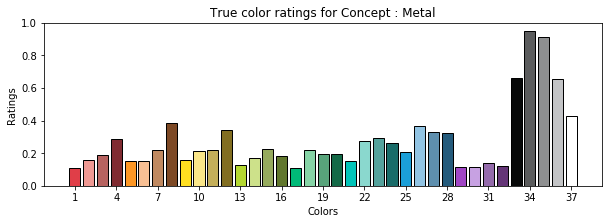

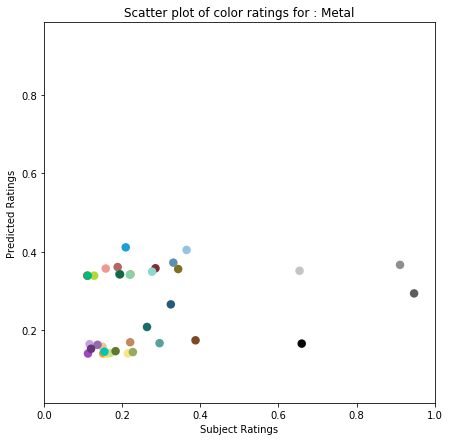

Total test images:  5.0
The true squared error (in color ratings) for left out fruit Glass is: 2.2675

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6355
p-value 0.0000


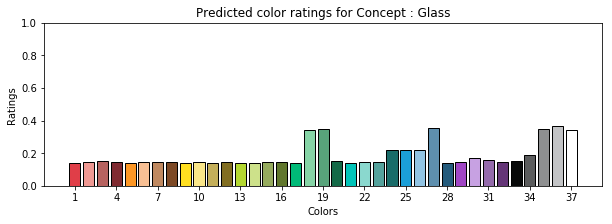

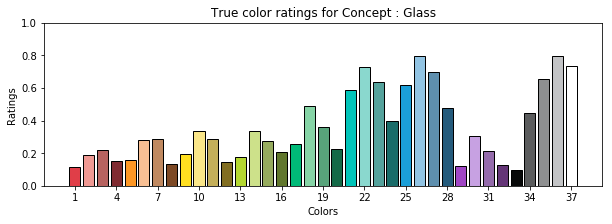

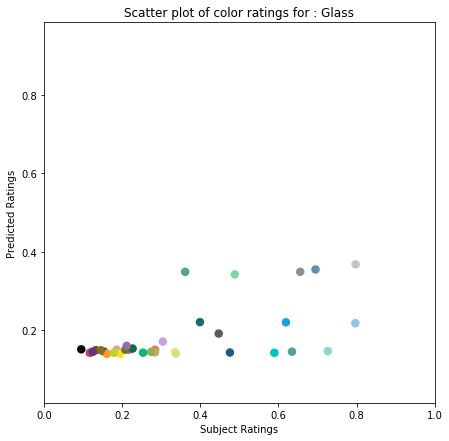

In [139]:
from scipy import stats
plt.close('all')
win0 = []
win1 = []
win2 = []

correlation = []
error = []

for i in range(len(strtInd)-1):
    # Leave one entire fruit group
    testFruit =  allConcepts[i]
    #print("\nLeaving out fruit group : ",allConcepts[i])
    y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i]+(5*numColors)])
    
    y_test = np.copy(ytest[strtInd[i]:strtInd[i]+(5*numColors)])
    #print(y_pred)
    totalTestImages = y_pred.size/numColors  #37N rows -> every image has 37 rows of data
    print("Total test images: ",  totalTestImages)
    avg_pred = np.array([np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)])
    #print(avg_pred)
    # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
    trueRating = np.copy(y_test[0:numColors])
   
    sqErr = np.sum(pow(avg_pred - trueRating,2))
    print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)
    
    corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
    
    print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
    print("p-value %.4f" %pVal)

    error.append(sqErr)
    correlation.append(corrCoeff)
    win0.append(corrCoeff) # saves correlation for test fruit
    win1.append(trueRating) # saves true rating for test fruit
    win2.append(avg_pred)   # saves avg predicted rating for test fruit
    # Plot average color rating over all test images.
    fig= plt.figure(figsize=(10,3))
    barPlot = plt.bar(range(1,numColors+1),avg_pred,color = colorDataRGB.values,edgeColor = [0, 0, 0])
    plt.ylabel('Ratings')
    plt.xlabel('Colors')
    plt.title('Predicted color ratings for Concept : %s' %testFruit)
    plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
    plt.ylim(0,1)
    plt.show()

    fig= plt.figure(figsize=(10,3))
    barPlot = plt.bar(range(1,numColors+1), trueRating,color = colorDataRGB.values,edgeColor = [0, 0, 0])
    plt.ylabel('Ratings')
    plt.xlabel('Colors')
    plt.title('True color ratings for Concept : %s' %testFruit)
    plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
    plt.ylim(0,1)
    plt.show()

    # Scatter plot
    fig2 = plt.figure(figsize=(7,7))
    plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,marker = 'o',linewidths=2.5)
    plt.ylabel('Predicted Ratings')
    plt.xlabel('Subject Ratings')
    plt.title('Scatter plot of color ratings for : %s' %testFruit)
    plt.axis('equal')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show() 

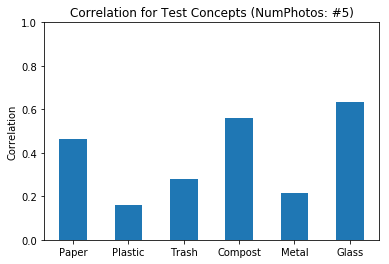

In [142]:
barWidth = 0.5
plt.bar(range(1,7),win0, width = barWidth)
plt.xticks(range(1,7),allConcepts)
plt.title("Correlation for Test Concepts (NumPhotos: #5)")
plt.ylabel('Correlation')
plt.ylim(0,1)
plt.show()